In [0]:
from google.colab import files
uploaded = files.upload()

Saving imports-86.csv to imports-86.csv


In [0]:
import pandas as pd
import numpy as np
data = pd.read_csv('imports-86.csv', engine = 'python')

In [0]:
data = data.replace('?', np.nan)

In [0]:
data = data.dropna()
data.head()

,symboling,Normalized-losses,make,Fuel-type,aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,length,width,height,Curb-weight,Engine-type,Num-of-cylinders,Engine-size,Fuel-system,bore,stroke,Compresson-ratio,horsepower,Peak-rpm,City-mpg,Highway-mpg,price
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


In [0]:
col = ['make', 'Fuel-type', 'Body-style', 'horsepower']
features = data[col]
features.head()

,make,Fuel-type,Body-style,horsepower
2,audi,gas,sedan,102
3,audi,gas,sedan,115
5,audi,gas,sedan,110
7,audi,gas,sedan,140
9,bmw,gas,sedan,101


In [0]:
target = data[['price']]
target.head()

,price
2,13950
3,17450
5,17710
7,23875
9,16430


In [0]:
pd.options.mode.chained_assignment = None
features['horsepower'].describe()

count     159
unique     48
top        68
freq       18
Name: horsepower, dtype: object

In [0]:
features['horsepower'] = pd.to_numeric(data['horsepower'])
features['horsepower'].describe()

count    159.000000
mean      95.836478
std       30.718583
min       48.000000
25%       69.000000
50%       88.000000
75%      114.000000
max      200.000000
Name: horsepower, dtype: float64

In [0]:
target = target.astype('float')
target.describe()

,price
count,159.000000
mean,11445.729560
std,5877.856195
min,5118.000000
25%,7372.000000
50%,9233.000000
75%,14719.500000
max,35056.000000


In [0]:
features = pd.get_dummies(features, columns = ['make', 'Fuel-type', 'Body-style'])
features.head()

,horsepower,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,Fuel-type_diesel,Fuel-type_gas,Body-style_convertible,Body-style_hardtop,Body-style_hatchback,Body-style_sedan,Body-style_wagon
2,0.201279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.625812,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
5,0.462530,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
7,1.442223,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
9,0.168622,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [0]:
from sklearn import preprocessing
features['horsepower'] = preprocessing.scale(features['horsepower'])
features[['horsepower']].head()

,horsepower
2,0.201279
3,0.625812
5,0.462530
7,1.442223
9,0.168622


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [0]:
import torch
dtype = torch.float

In [0]:
#since our data is in pandas dataframe version we convert it into tensor
x_train_tensor = torch.tensor(x_train.values, dtype = dtype)
y_train_tensor = torch.tensor(y_train.values, dtype = dtype)
x_test_tensor = torch.tensor(x_test.values, dtype = dtype)
y_test_tensor = torch.tensor(y_test.values, dtype = dtype)

In [0]:
print(x_train_tensor.shape)
print(y_train_tensor.shape)

torch.Size([127, 26])
torch.Size([127, 1])


In [0]:
input = 26 
hidden = 100
output = 1

loss_fn = torch.nn.MSELoss()
learning_rate = 0.0001


In [0]:
model = torch.nn.Sequential(torch.nn.Linear(input, hidden),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(hidden, output))

In [0]:
for iter in range(10000):
  y_pred = model(x_train_tensor)
  loss = loss_fn(y_pred,y_train_tensor)

  if iter % 1000 == 0:
    print(iter, loss.item())
  model.zero_grad()
  loss.backward()

  with torch.no_grad():
    for param in model.parameters():
      param -= learning_rate * param.grad


0 168080672.0
1000 4300072.5
2000 2377729.25
3000 1712677.75
4000 1345733.375
5000 1194592.875
6000 1093388.125
7000 1048912.875
8000 993698.4375
9000 962296.125


In [0]:
example = x_test.iloc[10]
example

horsepower                0.658469
make_audi                 0.000000
make_bmw                  0.000000
make_chevrolet            0.000000
make_dodge                0.000000
make_honda                0.000000
make_jaguar               0.000000
make_mazda                0.000000
make_mercedes-benz        0.000000
make_mitsubishi           0.000000
make_nissan               0.000000
make_peugot               0.000000
make_plymouth             0.000000
make_porsche              0.000000
make_saab                 0.000000
make_subaru               0.000000
make_toyota               1.000000
make_volkswagen           0.000000
make_volvo                0.000000
Fuel-type_diesel          0.000000
Fuel-type_gas             1.000000
Body-style_convertible    0.000000
Body-style_hardtop        0.000000
Body-style_hatchback      1.000000
Body-style_sedan          0.000000
Body-style_wagon          0.000000
Name: 168, dtype: float64

In [0]:
sample_tensor = torch.tensor(example.values, dtype = dtype)
sample_tensor

tensor([0.6585, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000,
        0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000])

In [0]:
y_pred = model(sample_tensor)
print("The predicted value of the car is", y_pred.item() )
print("The actual value of the car is", y_test.iloc[10] )

The predicted value of the car is 11296.7109375
The actual value of the car is price    9989.0
Name: 168, dtype: float64


In [0]:
y_pred_tensor = model(x_test_tensor)


In [0]:
y_pred = y_pred_tensor.detach().numpy()

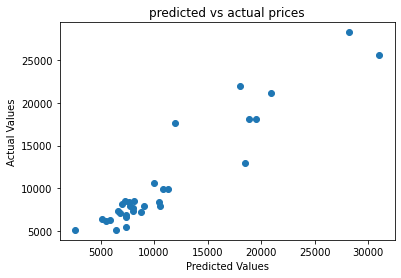

In [0]:
import matplotlib.pyplot as plt
plt.scatter(y_pred, y_test_tensor)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('predicted vs actual prices')
plt.show()

In [0]:
torch.save(model, 'my_model')

In [0]:
saved_model = torch.load('my_model')

In [0]:
y_pred_tensor = saved_model(x_test_tensor)
y_pred = y_pred_tensor.detach().numpy()

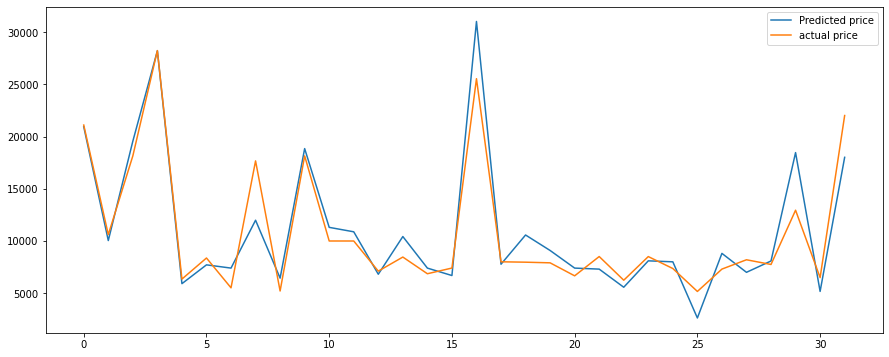

In [0]:
plt.figure(figsize = (15, 6))
plt.plot(y_pred, label = 'Predicted price')
plt.plot(y_test_tensor, label = 'actual price')
plt.legend()
plt.show()